In [1]:
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# define directories
base_dir = r'C:\Users\Public\5th\NeuralNetworks\ASSGINMENT3\Ex02\Jute_Pest_Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

C:\Users\8778t\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# set image size and batch size
img_height, img_width = 128, 128
batch_size = 32

# configure data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8,1.2],
    channel_shift_range=50,
    vertical_flip=True)  

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# create data genarators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# cnn model architecture
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Found 2085 images belonging to 5 classes.
Found 171 images belonging to 5 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 32)        128       
 chNormalization)                   

In [4]:
# callbacks - early stopping, model checkpoint, learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_improved.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=0.001)

In [5]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/30


65/65 [==============================] - ETA: 0s - loss: 1.7173 - accuracy: 0.5441
Epoch 1: val_accuracy improved from -inf to 0.54375, saving model to best_model_improved.h5
65/65 [==============================] - 36s 508ms/step - loss: 1.7173 - accuracy: 0.5441 - val_loss: 2.0851 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 2/30


C:\Users\8778t\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


65/65 [==============================] - ETA: 0s - loss: 0.9572 - accuracy: 0.6303
Epoch 2: val_accuracy improved from 0.54375 to 0.58125, saving model to best_model_improved.h5
65/65 [==============================] - 32s 489ms/step - loss: 0.9572 - accuracy: 0.6303 - val_loss: 2.6786 - val_accuracy: 0.5813 - lr: 0.0010
Epoch 3/30
65/65 [==============================] - ETA: 0s - loss: 0.8193 - accuracy: 0.6736
Epoch 3: val_accuracy did not improve from 0.58125
65/65 [==============================] - 31s 482ms/step - loss: 0.8193 - accuracy: 0.6736 - val_loss: 2.7515 - val_accuracy: 0.4437 - lr: 0.0010
Epoch 4/30
65/65 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.7058
Epoch 4: val_accuracy improved from 0.58125 to 0.61875, saving model to best_model_improved.h5
65/65 [==============================] - 30s 467ms/step - loss: 0.7358 - accuracy: 0.7058 - val_loss: 2.0521 - val_accuracy: 0.6187 - lr: 0.0010
Epoch 5/30
65/65 [==============================] - E

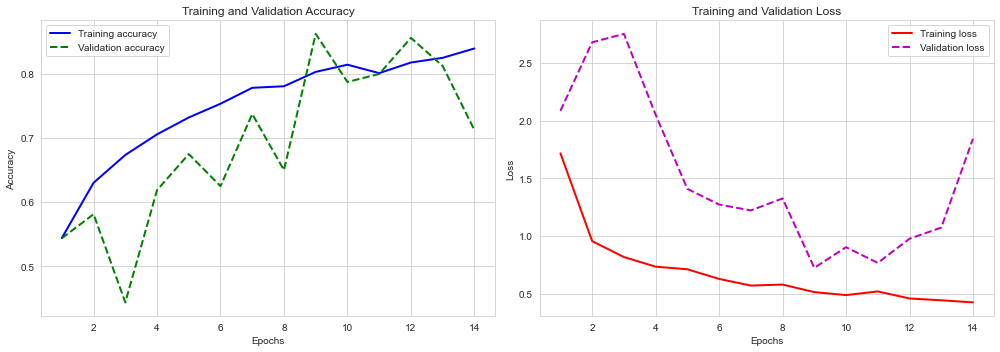

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot accuracy and loss
sns.set_style("whitegrid")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'g--', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training loss', linewidth=2)
plt.plot(epochs, val_loss, 'm--', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

Found 116 images belonging to 5 classes.
3/3 [==============================] - 1s 215ms/step - loss: 0.2701 - accuracy: 0.9062


{'Jute Stem Weevil': 0, 'Leaf Beetle': 1, 'Mealybug': 2, 'Termite': 3, 'Yellow Mite': 4}
1/1 [==============================] - 0s 76ms/step


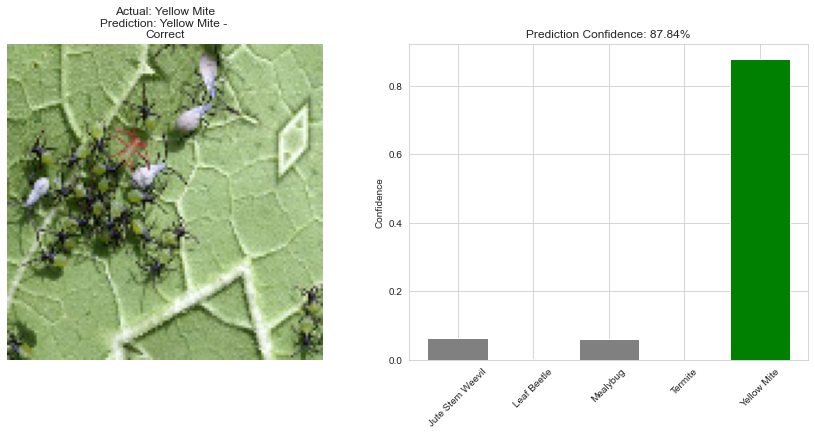

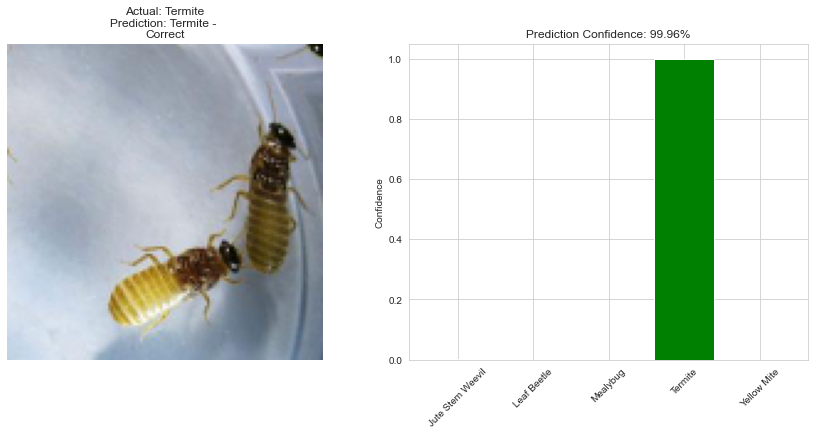

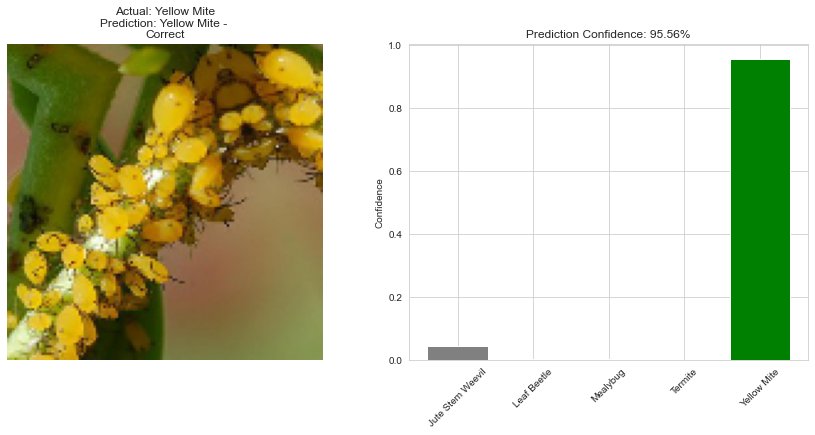

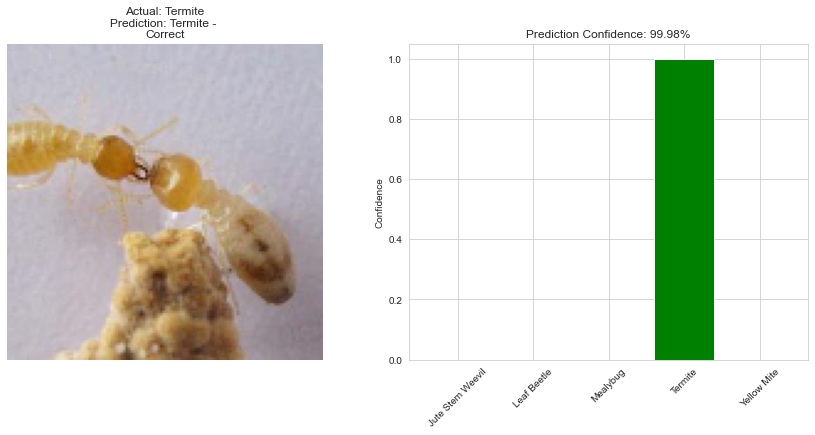

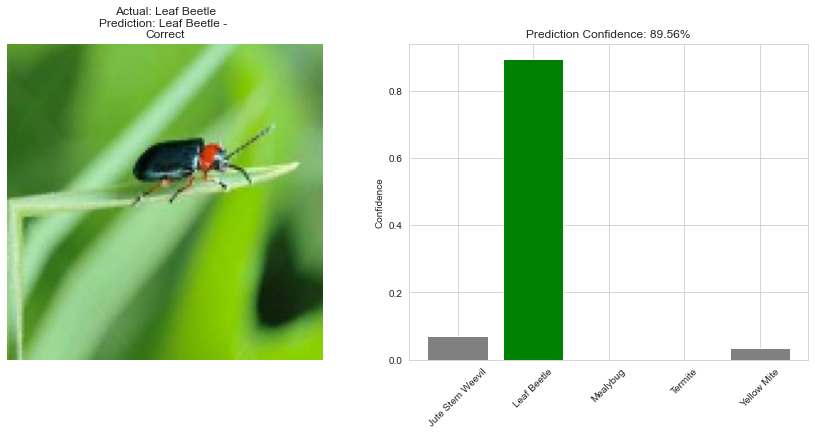

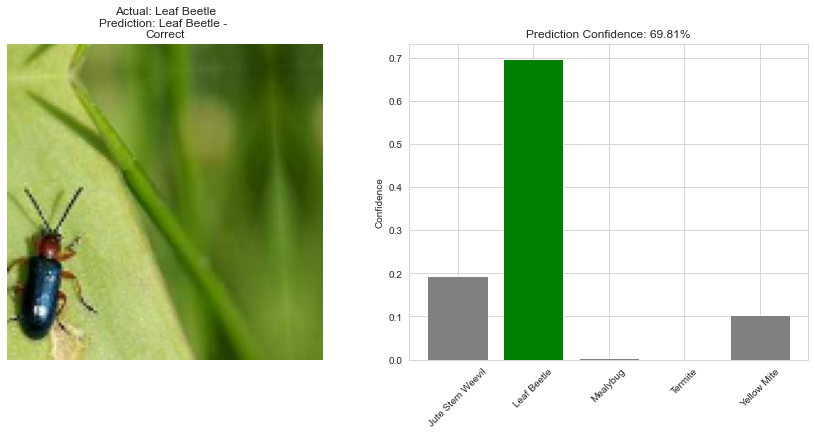

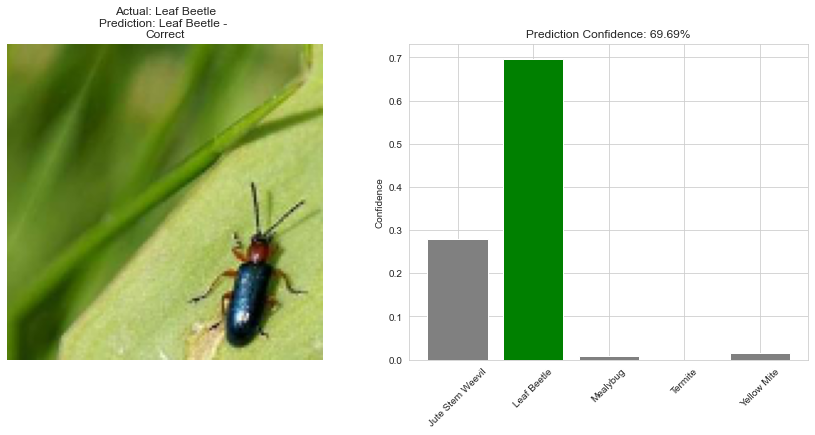

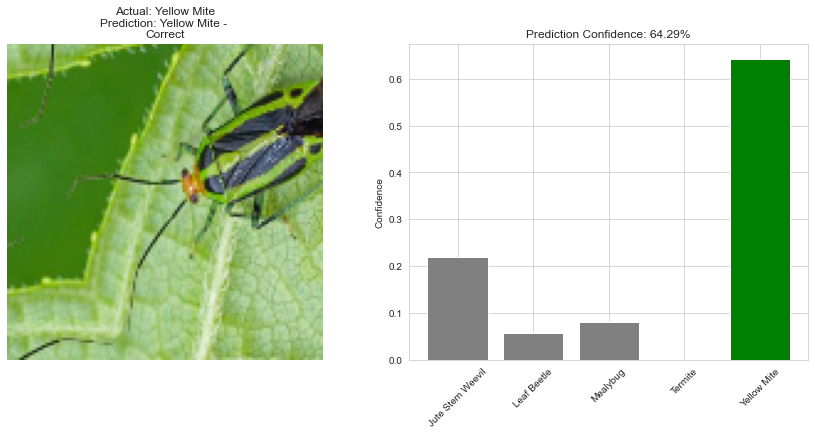

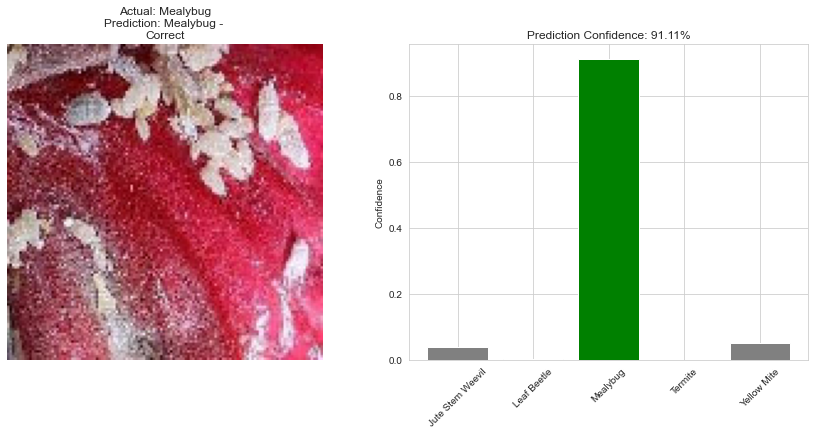

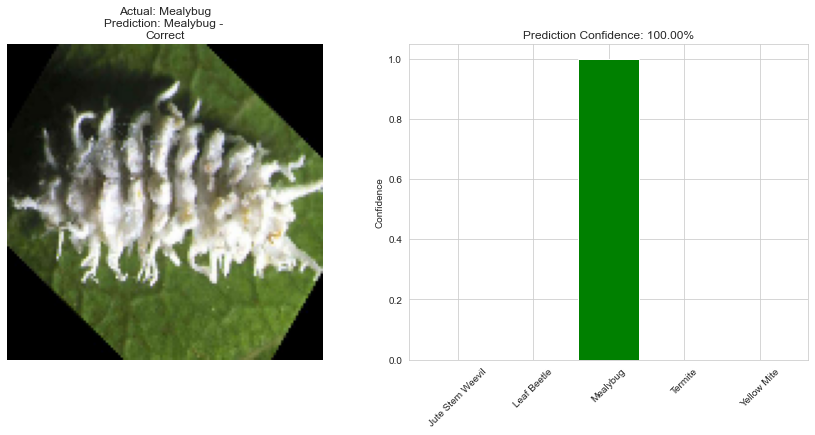

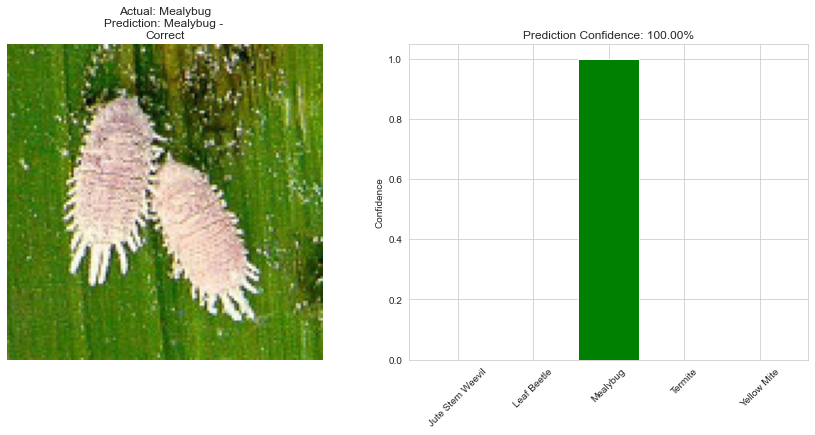

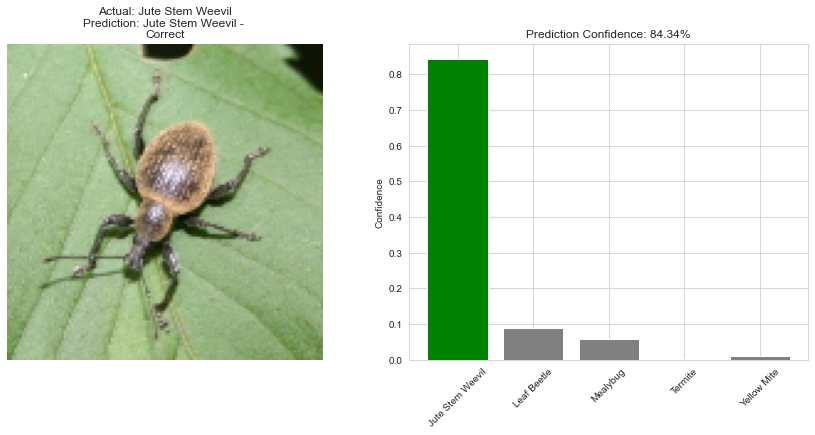

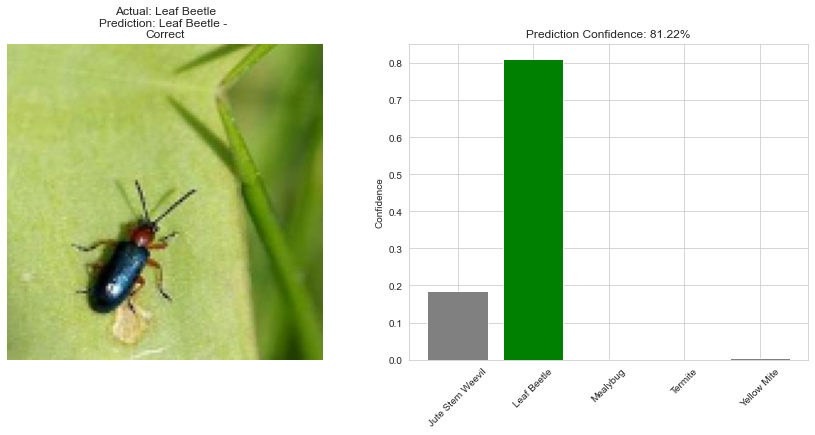

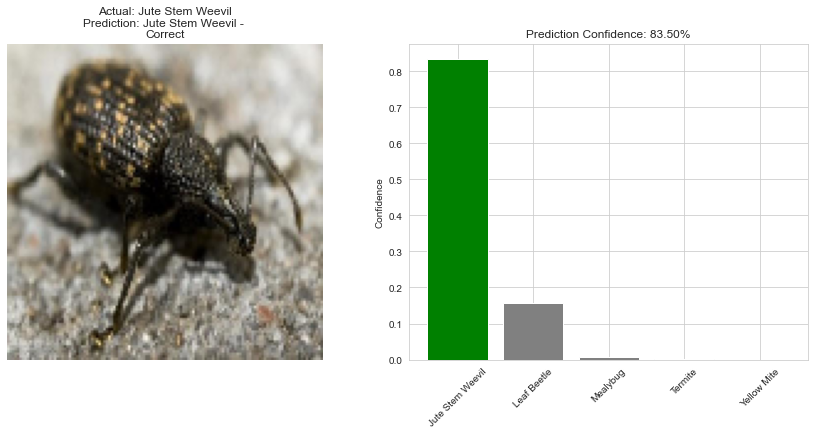

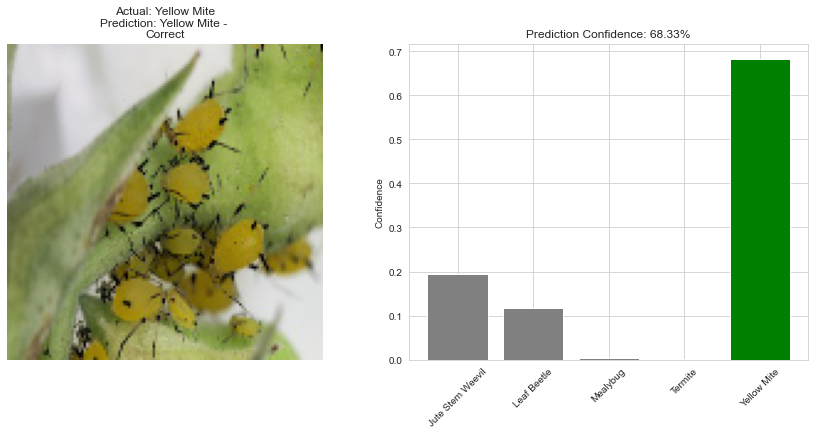

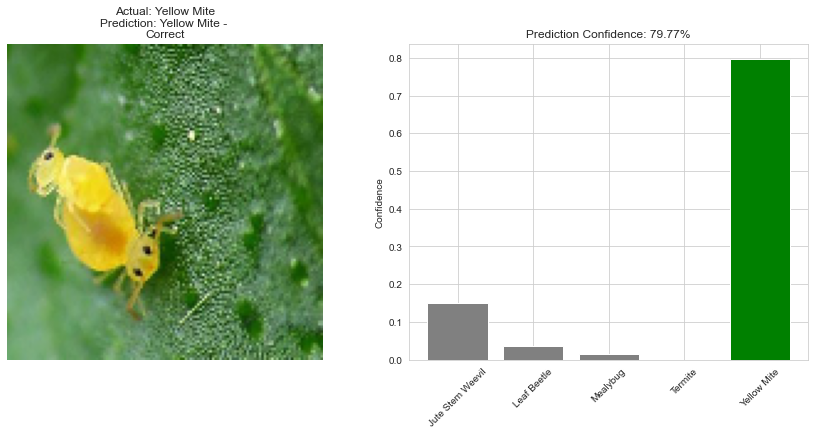

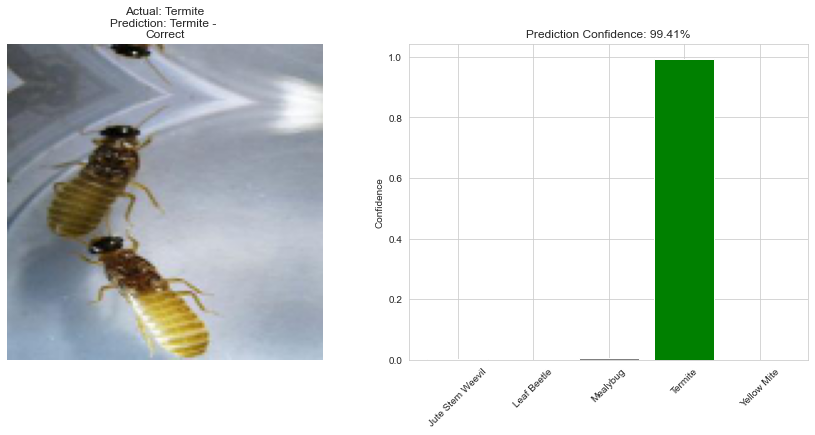

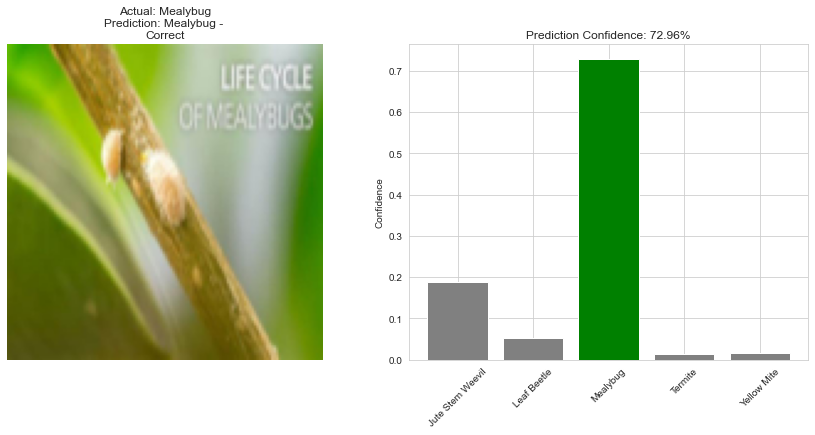

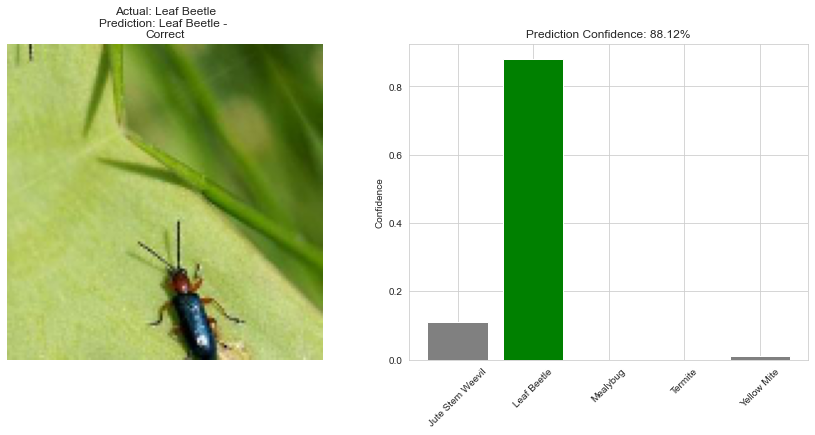

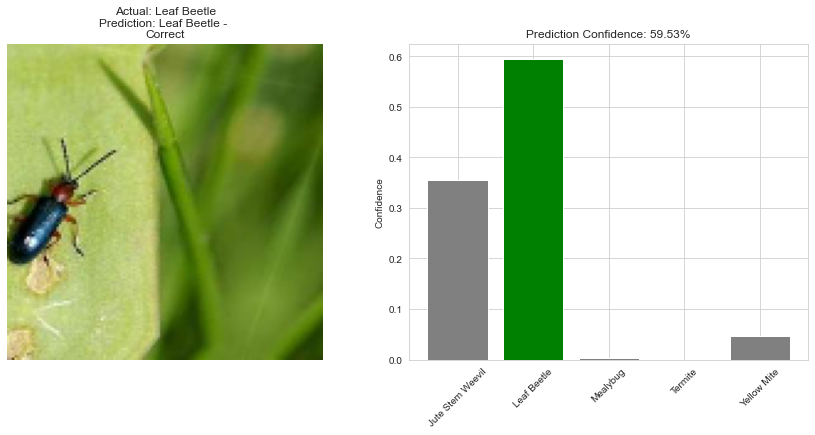

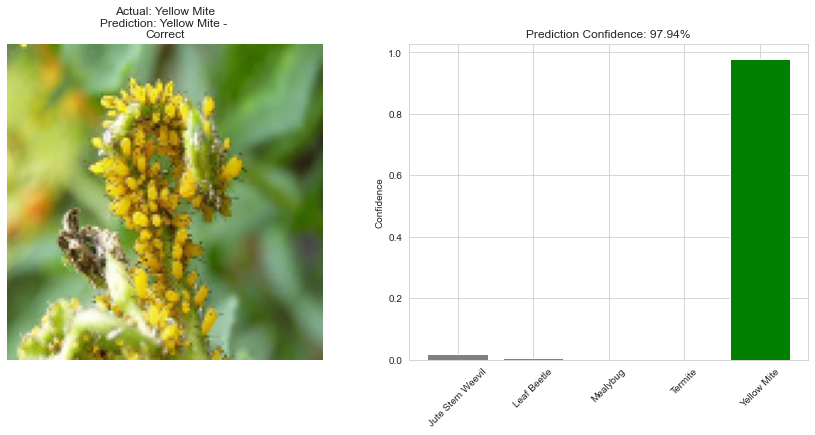

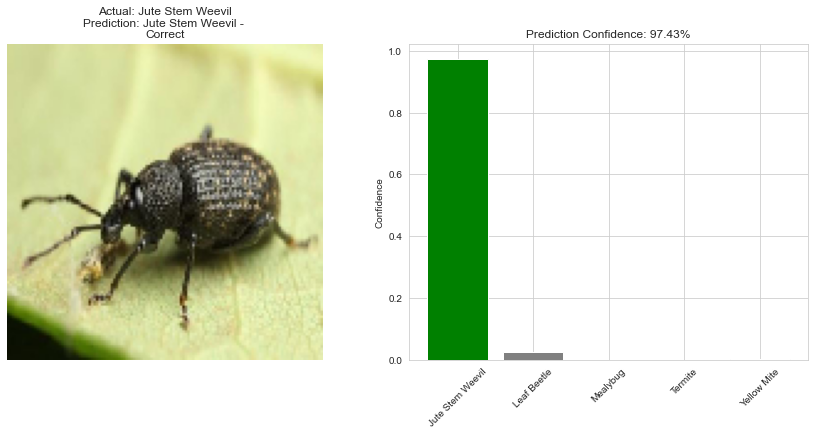

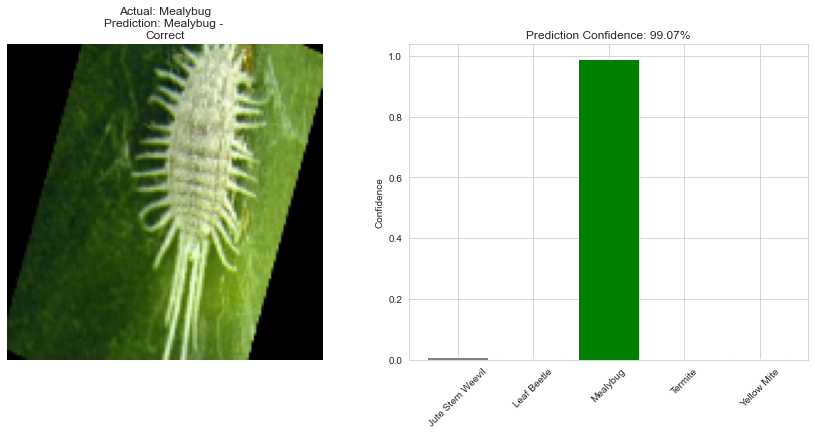

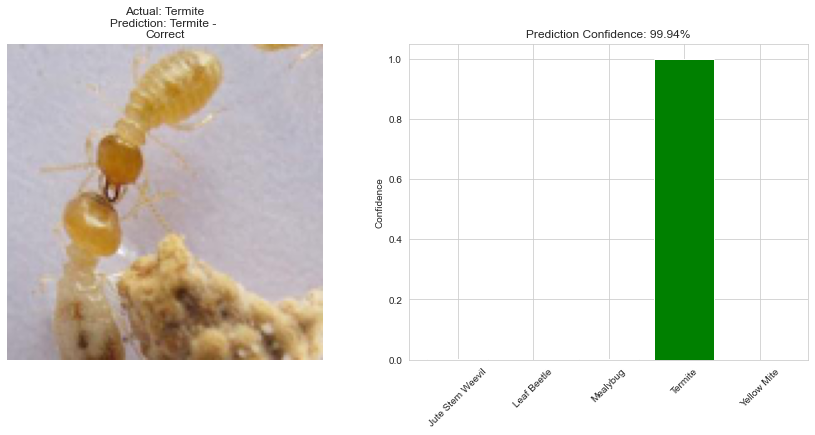

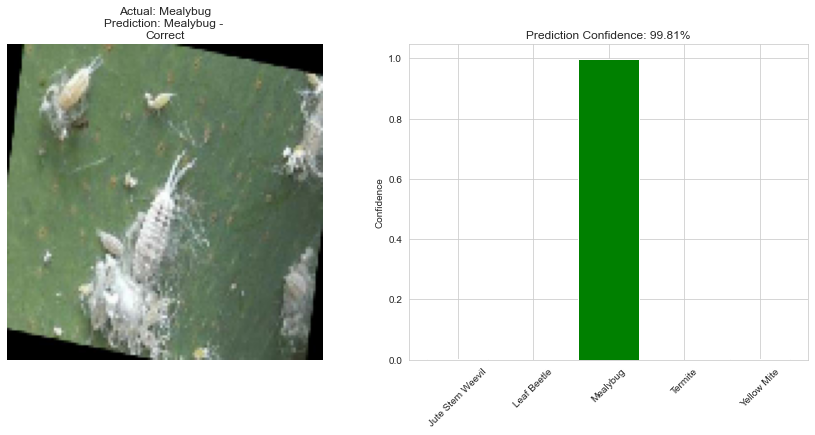

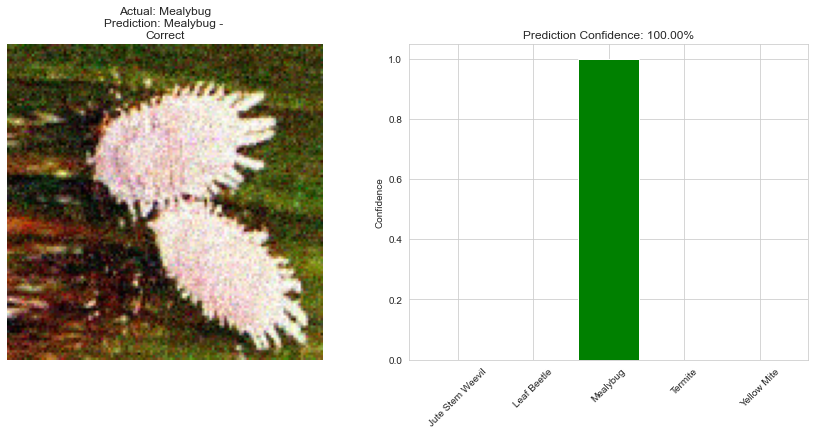

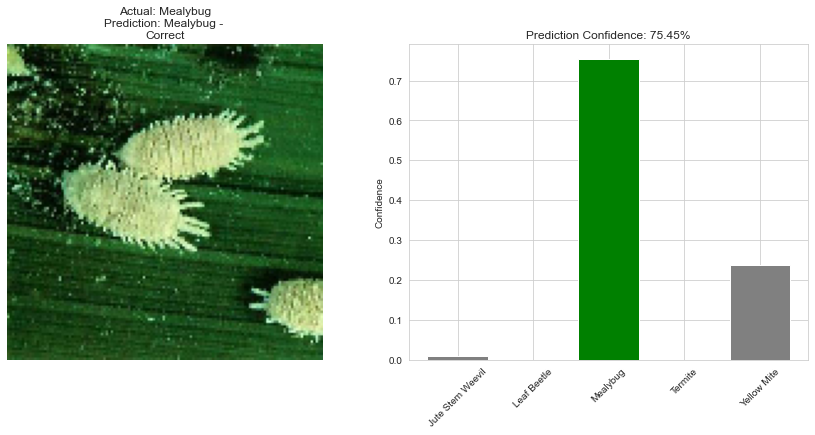

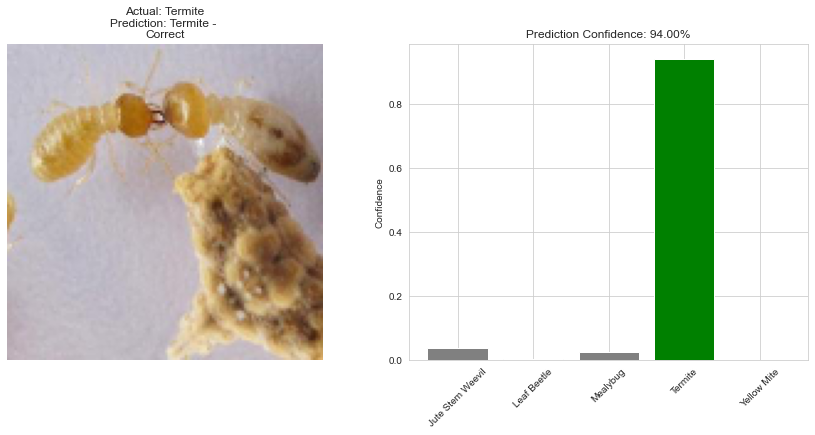

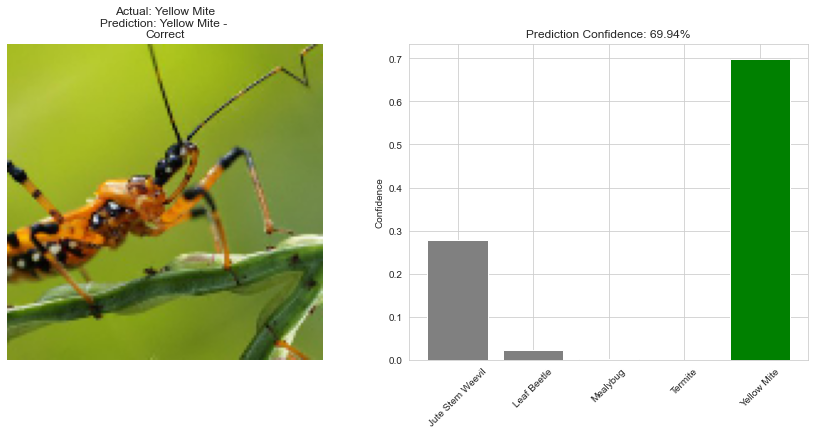

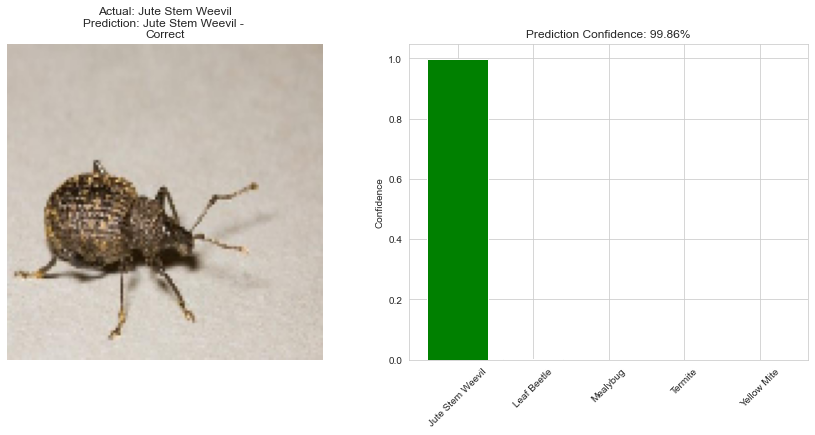

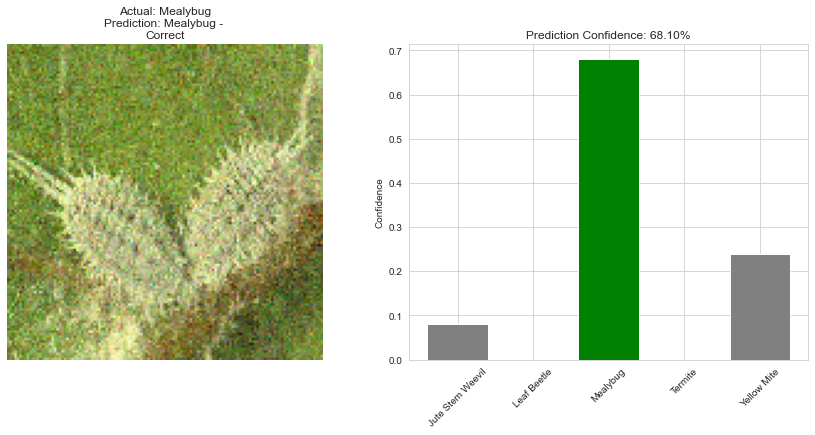

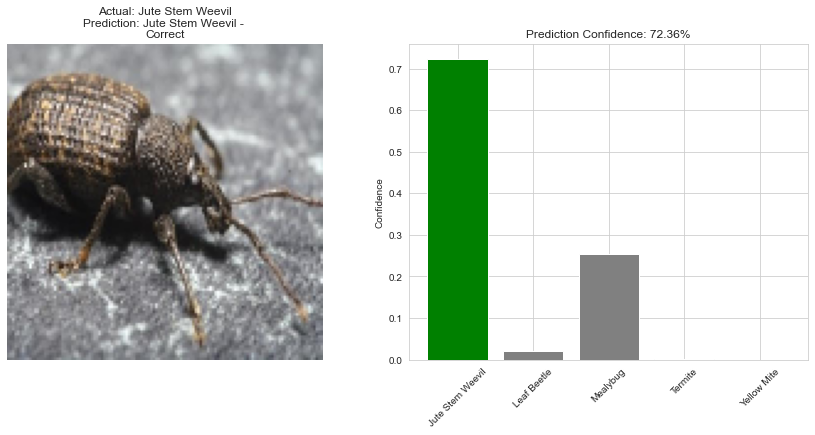

In [10]:
images, labels = next(test_generator)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_display_batch(images, labels, class_names):
    preds = model.predict(images)
    for i in range(len(images)):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(images[i])
        actual_class = class_names[np.argmax(labels[i])]
        predicted_class = class_names[np.argmax(preds[i])]
        correct = "Correct" if actual_class == predicted_class else "Incorrect"
        confidence = np.max(preds[i]) * 100
        plt.title(f"Actual: {actual_class}\nPrediction: {predicted_class} - \n{correct}")
        plt.axis('off')  
        
        plt.subplot(1, 2, 2)
        colors = ['green' if class_names[j] == predicted_class else 'grey' for j in range(len(class_names))]
        if correct == "Incorrect":
            colors[np.argmax(labels[i])] = 'red'  
        plt.bar(class_names, preds[i], color=colors)
        plt.title(f"Prediction Confidence: {confidence:.2f}%")
        plt.xticks(rotation=45)
        plt.ylabel('Confidence')
        plt.tight_layout()
        plt.show()

print(train_generator.class_indices)
class_names = ['Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Termite', 'Yellow Mite']
predict_and_display_batch(images, labels, class_names)

Accuracy

Although the training accuracy increases and training loss decreases as the epochs progress, the validation accuracy and loss fluctuate. Therefore, I used early stopping, and since I utilize restore_best_weights=True, the test accuracy reached 90%, with both training and validation accuracies above 80% at that time.

Pitfall

Overfitting:
To address this issue, I employed data augmentation, batch normalization, and dropout. Additionally, I opted for a relatively simple model architecture.

Imbalanced Classes:
To tackle this, I used data augmentation. I did not use data generation techniques, such as SMOTE, as my accuracy score was sufficiently high.

In [9]:
import os

def count_images_in_directories(base_dir):
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            print(f'Class: {folder_name}, Images: {num_images}')

print("Training Data:")
count_images_in_directories(train_dir)

print("\nValidation Data:")
count_images_in_directories(validation_dir)

print("\nTest Data:")
count_images_in_directories(test_dir)


Training Data:
Class: Jute Stem Weevil, Images: 676
Class: Leaf Beetle, Images: 310
Class: Mealybug, Images: 466
Class: Termite, Images: 291
Class: Yellow Mite, Images: 342

Validation Data:
Class: Jute Stem Weevil, Images: 71
Class: Leaf Beetle, Images: 9
Class: Mealybug, Images: 35
Class: Termite, Images: 26
Class: Yellow Mite, Images: 30

Test Data:
Class: Jute Stem Weevil, Images: 24
Class: Leaf Beetle, Images: 24
Class: Mealybug, Images: 24
Class: Termite, Images: 20
Class: Yellow Mite, Images: 24
